**Importing**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

**Reading data as matrices**

In [ ]:
file_Aggregation = "Aggregation.txt"
data_Aggregation = np.loadtxt(file_Aggregation, skiprows=7)

file_Compound = "Compound.txt"
data_Compound = np.loadtxt(file_Compound, skiprows=7)

file_D31 = "D31.txt"
data_D31 = np.loadtxt(file_D31, skiprows=7)

file_Flame = "Flame.txt"
data_Flame = np.loadtxt(file_Flame, skiprows=7)

file_Jain = "Jain.txt"
data_Jain = np.loadtxt(file_Jain, skiprows=7)

file_Pathbased = "Pathbased.txt"
data_Pathbased = np.loadtxt(file_Pathbased, skiprows=7)

file_R15 = "R15.txt"
data_R15 = np.loadtxt(file_R15, skiprows=7)

file_Spiral = "Spiral.txt"
data_Spiral = np.loadtxt(file_Spiral, skiprows=7)

**Converting data from matrices into data frames**

In [ ]:
data_Aggregation_df = pd.DataFrame(data_Aggregation)
data_Compound_df = pd.DataFrame(data_Compound)
data_D31_df = pd.DataFrame(data_D31)
data_Flame_df = pd.DataFrame(data_Flame)
data_Jain_df = pd.DataFrame(data_Jain)
data_Pathbased_df = pd.DataFrame(data_Pathbased)
data_R15_df = pd.DataFrame(data_R15)
data_Spiral_df = pd.DataFrame(data_Spiral)

**Splitting data to x and y**

In [ ]:
data_Aggregation_df_x = data_Aggregation_df.iloc[:, 0:2]
data_Aggregation_df_y = data_Aggregation_df.iloc[:, 2:3]

data_Compound_df_x = data_Compound_df.iloc[:, 0:2]
data_Compound_df_y = data_Compound_df.iloc[:, 2:3]

data_D31_df_x = data_D31_df.iloc[:, 0:2]
data_D31_df_y = data_D31_df.iloc[:, 2:3]

data_Flame_df_x = data_Flame_df.iloc[:, 0:2]
data_Flame_df_y = data_Flame_df.iloc[:, 2:3]

data_Jain_df_x = data_Jain_df.iloc[:, 0:2]
data_Jain_df_y = data_Jain_df.iloc[:, 2:3]

data_Pathbased_df_x = data_Pathbased_df.iloc[:, 0:2]
data_Pathbased_df_y =data_Pathbased_df.iloc[:, 2:3]

data_R15_df_x = data_R15_df.iloc[:, 0:2]
data_R15_df_y = data_R15_df.iloc[:, 2:3]

data_Spiral_df_x = data_Spiral_df.iloc[:, 0:2]
data_Spiral_df_y = data_Spiral_df.iloc[:, 2:3]

**Splitting data to train and test**

In [ ]:
data_Aggregation_df_x_train, data_Aggregation_df_x_test, data_Aggregation_df_y_train, data_Aggregation_df_y_test = train_test_split(data_Aggregation_df_x, data_Aggregation_df_y, test_size=0.2, random_state=1)
data_Compound_df_x_train, data_Compound_df_x_test, data_Compound_df_y_train, data_Compound_df_y_test = train_test_split(data_Compound_df_x, data_Compound_df_y, test_size=0.2, random_state=1)
data_D31_df_x_train, data_D31_df_x_test, data_D31_df_y_train, data_D31_df_y_test = train_test_split(data_D31_df_x, data_D31_df_y, test_size=0.2, random_state=1)
data_Flame_df_x_train, data_Flame_df_x_test, data_Flame_df_y_train, data_Flame_df_y_test = train_test_split(data_Flame_df_x, data_Flame_df_y, test_size=0.2, random_state=1)
data_Jain_df_x_train, data_Jain_df_x_test, data_Jain_df_y_train, data_Jain_df_y_test = train_test_split(data_Jain_df_x, data_Jain_df_y, test_size=0.2, random_state=1)
data_Pathbased_df_x_train, data_Pathbased_df_x_test, data_Pathbased_df_y_train, data_Pathbased_df_y_test = train_test_split(data_Pathbased_df_x, data_Pathbased_df_y, test_size=0.2, random_state=1)
data_R15_df_x_train, data_R15_df_x_test, data_R15_df_y_train, data_R15_df_y_test = train_test_split(data_R15_df_x, data_R15_df_y, test_size=0.2, random_state=1)
data_Spiral_df_x_train, data_Spiral_df_x_test, data_Spiral_df_y_train, data_Spiral_df_y_test = train_test_split(data_Spiral_df_x, data_Spiral_df_y, test_size=0.2, random_state=1)

**Applying SVM**

Settings

In [ ]:
tuned_parameters = {
    'C':  (np.arange(0.1,5,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
     "kernel":['linear', 'poly', 'rbf']
}
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

**Aggregation**



Processing

In [ ]:
model_svm.fit(data_Aggregation_df_x_train, data_Aggregation_df_y_train.values.ravel())
data_Aggregation_df_y_pred= model_svm.predict(data_Aggregation_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 0.1, 'gamma': 0.03, 'kernel': 'poly'}


In [ ]:
print(str(metrics.accuracy_score(data_Aggregation_df_y_pred,data_Aggregation_df_y_test)*100)+'%')

99.36708860759494%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


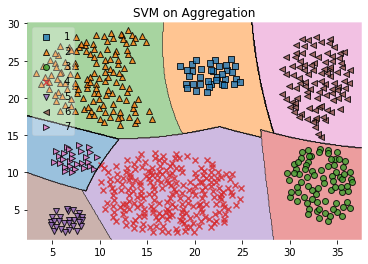

In [ ]:
plot_decision_regions(data_Aggregation_df_x_train.to_numpy(), data_Aggregation_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Aggregation')
plt.show()

**Compound**



Processing

In [ ]:
model_svm.fit(data_Compound_df_x_train, data_Compound_df_y_train.values.ravel())
data_Compound_df_y_pred= model_svm.predict(data_Compound_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 1.0, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_Compound_df_y_pred,data_Compound_df_y_test)*100)+'%')

98.75%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


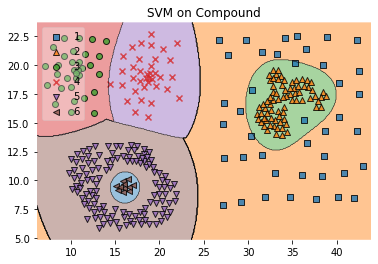

In [ ]:
plot_decision_regions(data_Compound_df_x_train.to_numpy(), data_Compound_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Compound')
plt.show()

**D31**



Processing

In [ ]:
model_svm.fit(data_D31_df_x_train, data_D31_df_y_train.values.ravel())
data_D31_df_y_pred= model_svm.predict(data_D31_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_D31_df_y_pred,data_D31_df_y_test)*100)+'%')

98.38709677419355%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


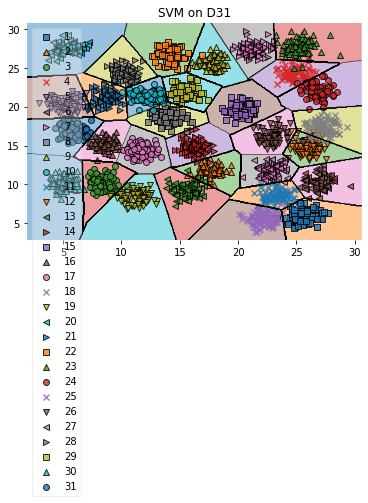

In [ ]:
plot_decision_regions(data_D31_df_x_train.to_numpy(), data_D31_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on D31')
plt.show()

**Flame**



Processing

In [ ]:
model_svm.fit(data_Flame_df_x_train, data_Flame_df_y_train.values.ravel())
data_Flame_df_y_pred= model_svm.predict(data_Flame_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 1.5000000000000002, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_Flame_df_y_pred,data_Flame_df_y_test)*100)+'%')

97.91666666666666%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


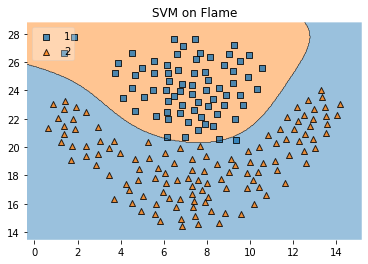

In [ ]:
plot_decision_regions(data_Flame_df_x_train.to_numpy(), data_Flame_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Flame')
plt.show()

**Jain**



Processing

In [ ]:
model_svm.fit(data_Jain_df_x_train, data_Jain_df_y_train.values.ravel())
data_Jain_df_y_pred= model_svm.predict(data_Jain_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 0.1, 'gamma': 0.02, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_Jain_df_y_pred,data_Jain_df_y_test)*100)+'%')

100.0%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


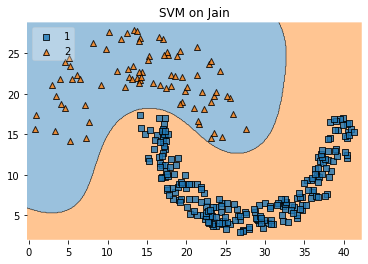

In [ ]:
plot_decision_regions(data_Jain_df_x_train.to_numpy(), data_Jain_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Jain')
plt.show()

**Pathbased**



Processing

In [ ]:
model_svm.fit(data_Pathbased_df_x_train, data_Pathbased_df_y_train.values.ravel())
data_Pathbased_df_y_pred= model_svm.predict(data_Pathbased_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 0.4, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_Pathbased_df_y_pred,data_Pathbased_df_y_test)*100)+'%')

96.66666666666667%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


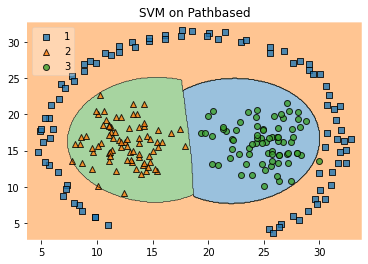

In [ ]:
plot_decision_regions(data_Pathbased_df_x_train.to_numpy(), data_Pathbased_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Pathbased')
plt.show()

**R15**



Processing

In [ ]:
model_svm.fit(data_R15_df_x_train, data_R15_df_y_train.values.ravel())
data_R15_df_y_pred= model_svm.predict(data_R15_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
print(str(metrics.accuracy_score(data_R15_df_y_pred,data_R15_df_y_test)*100)+'%')

100.0%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


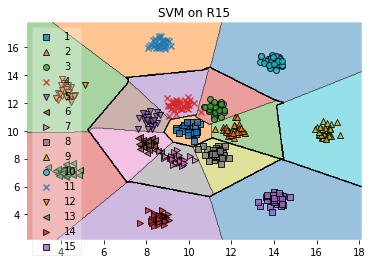

In [ ]:
plot_decision_regions(data_R15_df_x_train.to_numpy(), data_R15_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on R15')
plt.show()

**Spiral**



Processing

In [ ]:
model_svm.fit(data_Spiral_df_x_train, data_Spiral_df_y_train.values.ravel())
data_Spiral_df_y_pred= model_svm.predict(data_Spiral_df_x_test)

In [ ]:
print(model_svm.best_params_)

{'C': 0.2, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
print(str(metrics.accuracy_score(data_Spiral_df_y_pred,data_Spiral_df_y_test)*100)+'%')

100.0%


Visualisation

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


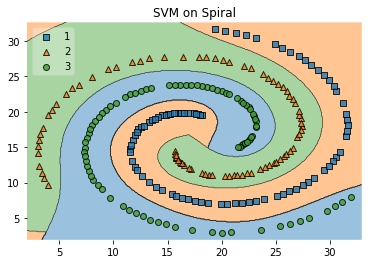

In [ ]:
plot_decision_regions(data_Spiral_df_x_train.to_numpy(), data_Spiral_df_y_train.values.ravel().astype('int'), clf=model_svm, legend=2)
plt.title('SVM on Spiral')
plt.show()